We will set up everything as we did in tutorial 1 except we no longer need sw_build_systems and instead now need to work with sw_openmm

In [1]:
# Import filepath manager
from modules.sw_directories import *

# Import openmm module
from modules.sw_openmm import *

In [2]:
# Initiate filepath manager
main_dir = !pwd
main_dir = main_dir[0]
directories = PolymerSimulatorDirs(main_dir)

We can check what simulation systems are avaialable (you should have some after following tutorial 1)

In [3]:
# See what systems are available
directories.systems_avail(directories)

3HB_monomer_2_2_array.rst7
3HB_monomer_2_2_array.prmtop
3HB_monomer_2_2_array.rst7
3HB_monomer_3_3_array.rst7
3HB_monomer_3_3_array.prmtop
3HB_monomer_2_2_array.prmtop
3HB_monomer_3_3_array.rst7
3HB_monomer_3_3_array.prmtop

Remember you need both .prmtop and .rst7 files to run a simulation


# Setting up simulation

To begin setting up a simulation, we need to specify a topology file and coordinate file as seen below. Then we can use these to set up an Amber simulation.

In [4]:
# Load topology and coordinate files
topology_file, coordinate_file = directories.retrieve_top_crds(directories, "3HB_monomer_3_3_array")

In [5]:
# We can check the filepaths by printing them
print(topology_file, coordinate_file)

/home/dan/polymersimulator/pdb_files/systems/3HB_monomer_3_3_array/3HB_monomer_3_3_array.prmtop /home/dan/polymersimulator/pdb_files/systems/3HB_monomer_3_3_array/3HB_monomer_3_3_array.rst7


Now we call 'AmberSimulation' and specifiy the topology and coordinate files as arguments.

In [6]:
# Set up simulation object called 'sim' - we will call 'sim' throughout the rest of this code to prepare and run simulations
sim = AmberSimulation(topology_file, coordinate_file)

In [7]:
# 2 functions to return some information on the simulation - not required but are useful to know about
repr(sim)
str(sim)

Simulation parameters: ('1', '300', '2.0, 1.0, 1000, 1000')


'Amber simulation object of - 3HB_monomer_3_3_array'

We can check our parameters by running: simulation_object.parameter

In [8]:
# Show parameters
sim.temp, sim.pressure, sim.timestep, sim.friction_coeff, sim.total_steps, sim.reporter_freq

(300, 1, 2.0, 1.0, 1000, 1000)

Those are general parameters, but we have another set of parameters for annealing which can be called by running: simulation.anneal_parameters. More information can be found on these in the **openmm_simulation_guide.ipynb**.

In [9]:
# Show annealing parameters
sim.anneal_parameters

[300, 700, 5, 3000, 100]

There are ways to set parameters for simulation and more details can be found in **openmm_simulation_guide**. If you want to run simulations with different parameters it is essential to learn these additional methods, otherwise the parameters will be set as the above ones by default.

# Running simulations

Much more information regarding simulations with full explanations can be found in **openmm_simulation_guide** the methods and explanations below are not as in depth and the methods here are provided as a quick start guide.

#### Recommended recipes

For a molecular dynamic simulation, you will want to create a *recipe*. This is series of steps you are taking to reach and run the production run.

1. Minimization --> Annealing -- > Equilibration --> Production run <br>
**For use with complex mixtures of molecules**<br>
2. Minimization --> Equilibration --> Production run <br>
**For use with systems where the initial structure is to be investigated**

For the systems of arrays, we will use recipe **2** as we want to simulate arrays of our given molecules. (annealing will randomize the the distributions of molecules within a system)

In [10]:
# The first step of a simulation is to minimize the energy of our system
minimized_sim = sim.minimize_energy()

In [11]:
# We set the total steps to 10,000 - enough for a test, but for a full simulation, we will need many more steps
sim.set_total_steps(10000)

# Using our 'minimized_sim' we can equilibrate our system. We unpack 2 variables, our 'equilibrated_sim' and 'equilibrated_sim_data'. We can generate graphs of our data from this second variable.
equilibrated_sim, equilibrated_sim_data = sim.equilibrate(directories, minimized_sim)

Total steps for simulation set to:  10000


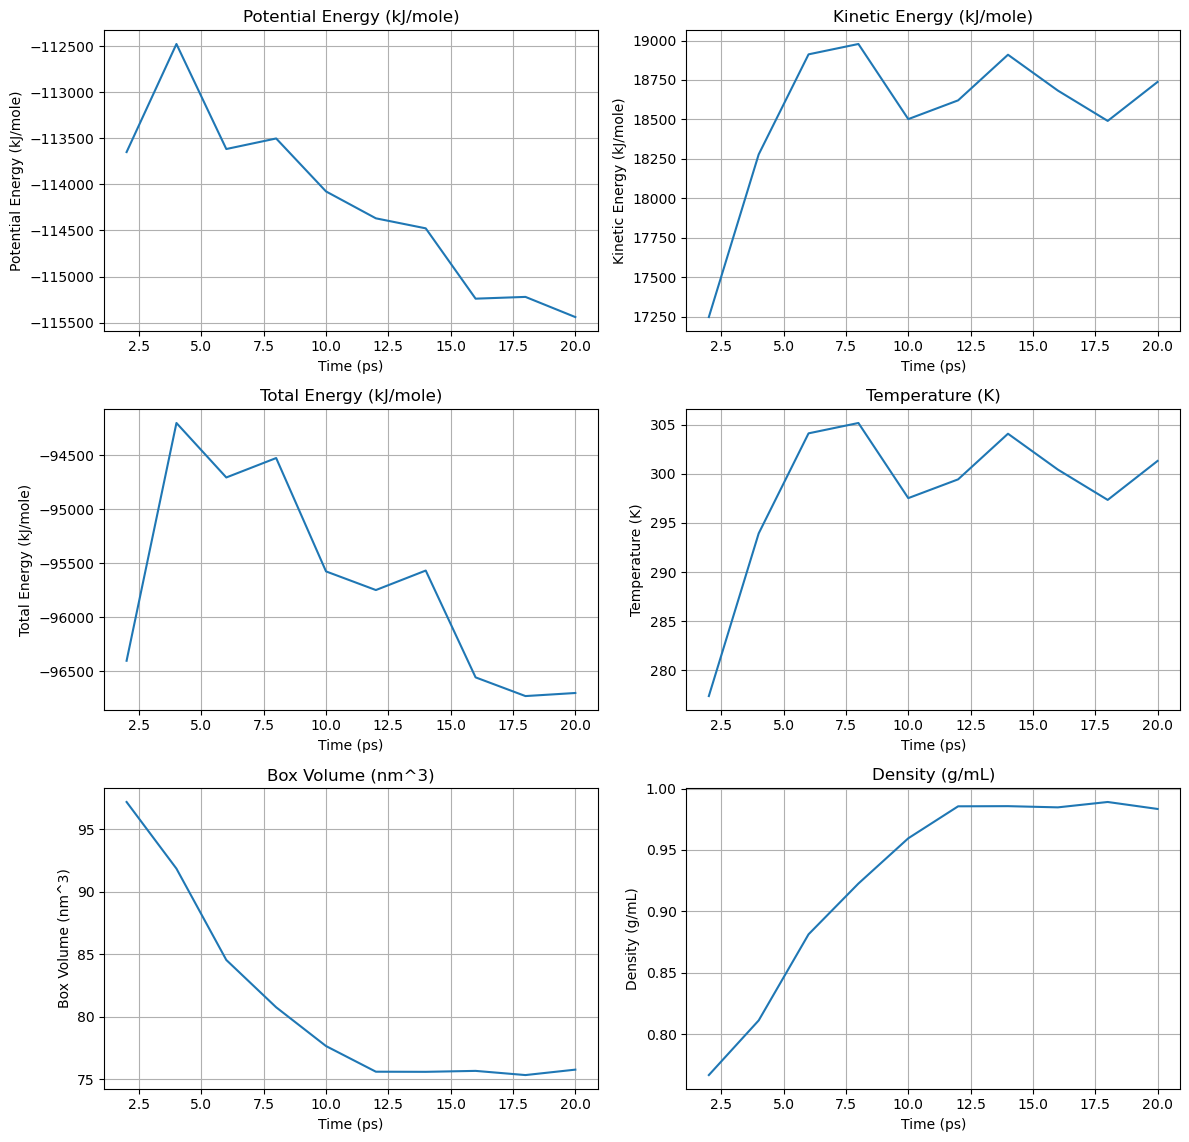

In [12]:
# Plot the data from our 'equilibrated_sim_data' variable.
sim.graph_state_data(equilibrated_sim_data)

Now we can a follow a simular process to run our simulation but with 'equilibrated_sim' and our input instead this time. <br>
We can also plot the data from the simulation.

In [13]:
# Run a production simulation using the simulation object returned after equilibration - we retireve the data file from this simulation in this line too
production_sim, production_sim_data = sim.production_run(directories, equilibrated_sim)

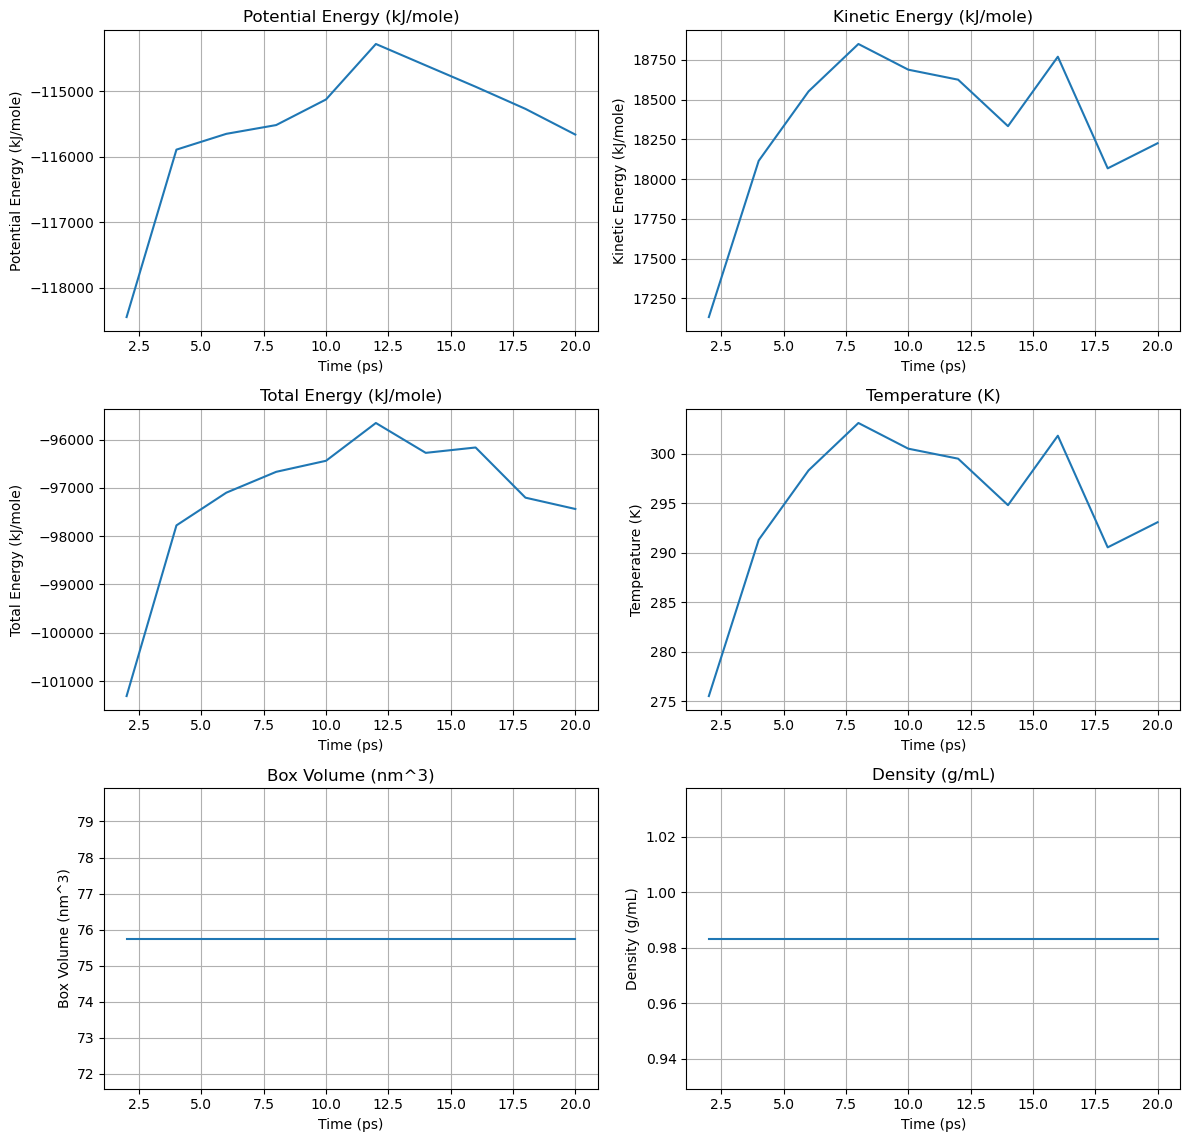

In [14]:
# Generate graphs from data collected during the production run of the simulation
sim.graph_state_data(production_sim_data)

It is key to understand that simulations should typically for many more steps and the cases included here are simply examples and tests.